BUAI 446 Assignment 1 - Akron Zoo  
Name: Ruihuang Yang  
NetID: rxy216  
Date: 09/07/2025  
Disclaimer: Some code in this document was generated with assistance from Claude 4.0 Sonnet.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import random

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)

### Load and Explore Data

In [2]:
# Load training and test datasets
train_data = pd.read_csv('data/ZOOLOG1-TRAIN-2025.csv')
test_data = pd.read_csv('data/ZOOLOG1-TEST-2025.csv')

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (740, 20)
Test Data Shape: (303, 20)


### Basic Data Exploration

In [3]:
# Display first few rows of training data
print("Training Data - First 5 rows:")
print(train_data.head())

Training Data - First 5 rows:
   NID  UPD  benefits   costs   value  identity    know     sat     fle  \
0    1    0    0.8011 -0.2225 -0.2900    0.7353  0.4332  0.8511 -0.6795   
1    2    0   -0.8915 -0.2831  0.8196   -0.9243 -2.4690  0.8511 -0.6795   
2    3    1   -0.4484  1.0290 -0.4391   -0.8858 -0.2342  0.8511  0.8696   
3    4    0   -0.9444  0.4703 -1.6980   -0.2679 -0.6842 -0.5246 -1.2470   
4    5    0   -0.1004  0.8337 -0.4391   -1.0960 -0.6842 -0.5246  0.3787   

   trustfor  age  gender  educ  mstat  size  child1  dist  tvis  age_rec  \
0 -0.057583    4       2     1      1     3       4     3     3        3   
1  0.105467    2       2     3      1     5       3     4     2        1   
2 -0.057583    2       2     4      1     5       3     3     3        1   
3 -0.709000    4       1     3      1     5       3     4     3        3   
4 -1.732333    4       1     2      1     2       4     3     5        3   

   educnew  
0        0  
1        1  
2        2  
3        1

In [4]:
# Display column information
print("\nTraining Data - Column Info:")
print(train_data.info())


Training Data - Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NID       740 non-null    int64  
 1   UPD       740 non-null    int64  
 2   benefits  740 non-null    float64
 3   costs     740 non-null    float64
 4   value     740 non-null    float64
 5   identity  740 non-null    float64
 6   know      740 non-null    float64
 7   sat       740 non-null    float64
 8   fle       740 non-null    float64
 9   trustfor  740 non-null    float64
 10  age       740 non-null    int64  
 11  gender    740 non-null    int64  
 12  educ      740 non-null    int64  
 13  mstat     740 non-null    int64  
 14  size      740 non-null    int64  
 15  child1    740 non-null    int64  
 16  dist      740 non-null    int64  
 17  tvis      740 non-null    int64  
 18  age_rec   740 non-null    int64  
 19  educnew   740 non-null    int64  
dtypes:

In [5]:
# Display basic statistics
print("\nTraining Data - Descriptive Statistics:")
print(train_data.describe())


Training Data - Descriptive Statistics:
               NID         UPD    benefits       costs       value  \
count   740.000000  740.000000  740.000000  740.000000  740.000000   
mean    524.189189    0.500000   -0.032099   -0.007556   -0.035639   
std     305.265029    0.500338    1.209893    1.090441    1.053612   
min       1.000000    0.000000   -4.988000   -1.332000   -4.728000   
25%     257.500000    0.000000   -0.643500   -1.039000   -0.439100   
50%     531.500000    0.500000    0.152200    0.043310    0.370100   
75%     790.500000    1.000000    0.811500    0.673700    0.819600   
max    1042.000000    1.000000    1.355000    4.169000    0.819600   

         identity        know         sat         fle    trustfor         age  \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean    -0.025827   -0.020556   -0.027073   -0.006966    0.003556    3.459459   
std      1.105308    1.065872    1.037607    1.030317    0.884611    1.007270   
min 

In [6]:
# Check for missing values
print("\nMissing values in training data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in training data:
NID         0
UPD         0
benefits    0
costs       0
value       0
identity    0
know        0
sat         0
fle         0
trustfor    0
age         0
gender      0
educ        0
mstat       0
size        0
child1      0
dist        0
tvis        0
age_rec     0
educnew     0
dtype: int64

Missing values in test data:
NID         0
UPD         0
benefits    0
costs       0
value       0
identity    0
know        0
sat         0
fle         0
trustfor    0
age         0
gender      0
educ        0
mstat       0
size        0
child1      0
dist        0
tvis        0
age_rec     0
educnew     0
dtype: int64


In [7]:
# Check target variable distribution
print("\nTarget variable (UPD) distribution in training data:")
print(train_data['UPD'].value_counts())
print(f"\nUpgrade rate: {train_data['UPD'].mean():.3f}")


Target variable (UPD) distribution in training data:
UPD
0    370
1    370
Name: count, dtype: int64

Upgrade rate: 0.500


### Visualization Setup


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

# Set up beautiful styling for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Define a professional color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83']
upgrade_colors = ['#E74C3C', '#2ECC71']  # Red for No Upgrade, Green for Upgrade


### Dataset Balance Analysis


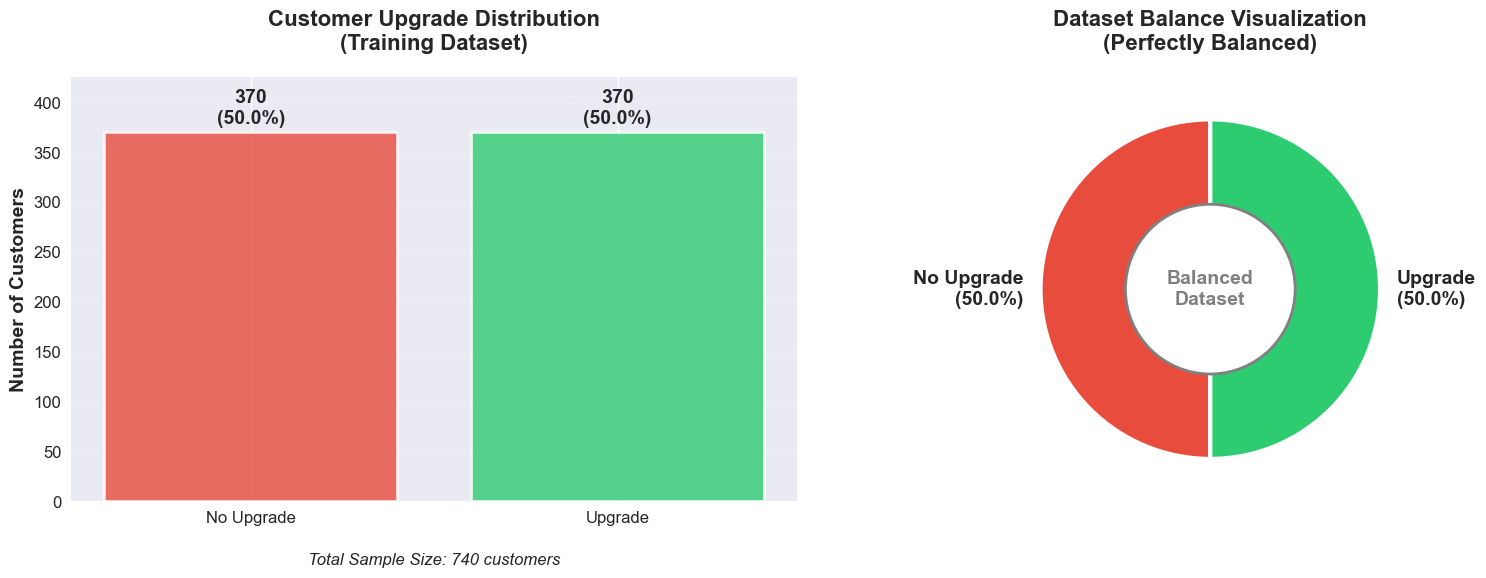

Dataset Balance Summary:
• No Upgrade: 370 customers (50.0%)
• Upgrade: 370 customers (50.0%)
• Perfect balance ratio: 1:1
• Total sample size: 740 customers


In [9]:
# Create a comprehensive view of dataset balance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart showing upgrade distribution
upgrade_counts = train_data['UPD'].value_counts().sort_index()
bars = ax1.bar(['No Upgrade', 'Upgrade'], upgrade_counts.values, 
               color=upgrade_colors, alpha=0.8, edgecolor='white', linewidth=2)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, upgrade_counts.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}\n({count/len(train_data)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=14)

ax1.set_title('Customer Upgrade Distribution\n(Training Dataset)', fontweight='bold', pad=20)
ax1.set_ylabel('Number of Customers', fontweight='bold')
ax1.set_ylim(0, max(upgrade_counts.values) * 1.15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add sample size annotation
ax1.text(0.5, -0.15, f'Total Sample Size: {len(train_data)} customers', 
         transform=ax1.transAxes, ha='center', fontsize=12, style='italic')

# Pie chart for visual balance
wedges, texts, autotexts = ax2.pie(upgrade_counts.values, 
                                  labels=['No Upgrade\n(50.0%)', 'Upgrade\n(50.0%)'],
                                  colors=upgrade_colors, autopct='',
                                  startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'},
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 3})

ax2.set_title('Dataset Balance Visualization\n(Perfectly Balanced)', fontweight='bold', pad=20)

# Add center circle for donut effect
centre_circle = plt.Circle((0,0), 0.50, fc='white', linewidth=2, edgecolor='gray')
ax2.add_artist(centre_circle)
ax2.text(0, 0, 'Balanced\nDataset', ha='center', va='center', 
         fontsize=14, fontweight='bold', color='gray')

plt.tight_layout()
plt.show()

print("Dataset Balance Summary:")
print(f"• No Upgrade: {upgrade_counts[0]} customers ({upgrade_counts[0]/len(train_data)*100:.1f}%)")
print(f"• Upgrade: {upgrade_counts[1]} customers ({upgrade_counts[1]/len(train_data)*100:.1f}%)")
print("• Perfect balance ratio: 1:1")
print(f"• Total sample size: {len(train_data)} customers")


### Distance vs Upgrade Behavior Analysis


In [10]:
# Create distance labels for better visualization
distance_labels = {1: '< 10 min', 2: '10-20 min', 3: '21-30 min', 4: '> 30 min'}
train_data['dist_label'] = train_data['dist'].map(distance_labels)

# Calculate upgrade rates by distance
dist_analysis = train_data.groupby('dist_label').agg({
    'UPD': ['count', 'sum', 'mean']
}).round(3)
dist_analysis.columns = ['Total_Customers', 'Upgrades', 'Upgrade_Rate']
dist_analysis = dist_analysis.reindex(['< 10 min', '10-20 min', '21-30 min', '> 30 min'])

print("Distance vs Upgrade Analysis:")
print("=" * 50)
for dist, row in dist_analysis.iterrows():
    print(f"{dist:12s}: {row['Total_Customers']:3.0f} customers, "
          f"{row['Upgrades']:3.0f} upgrades ({row['Upgrade_Rate']*100:5.1f}%)")
print("=" * 50)


Distance vs Upgrade Analysis:
< 10 min    :  37 customers,  27 upgrades ( 73.0%)
10-20 min   : 200 customers, 105 upgrades ( 52.5%)
21-30 min   : 299 customers, 147 upgrades ( 49.2%)
> 30 min    : 204 customers,  91 upgrades ( 44.6%)


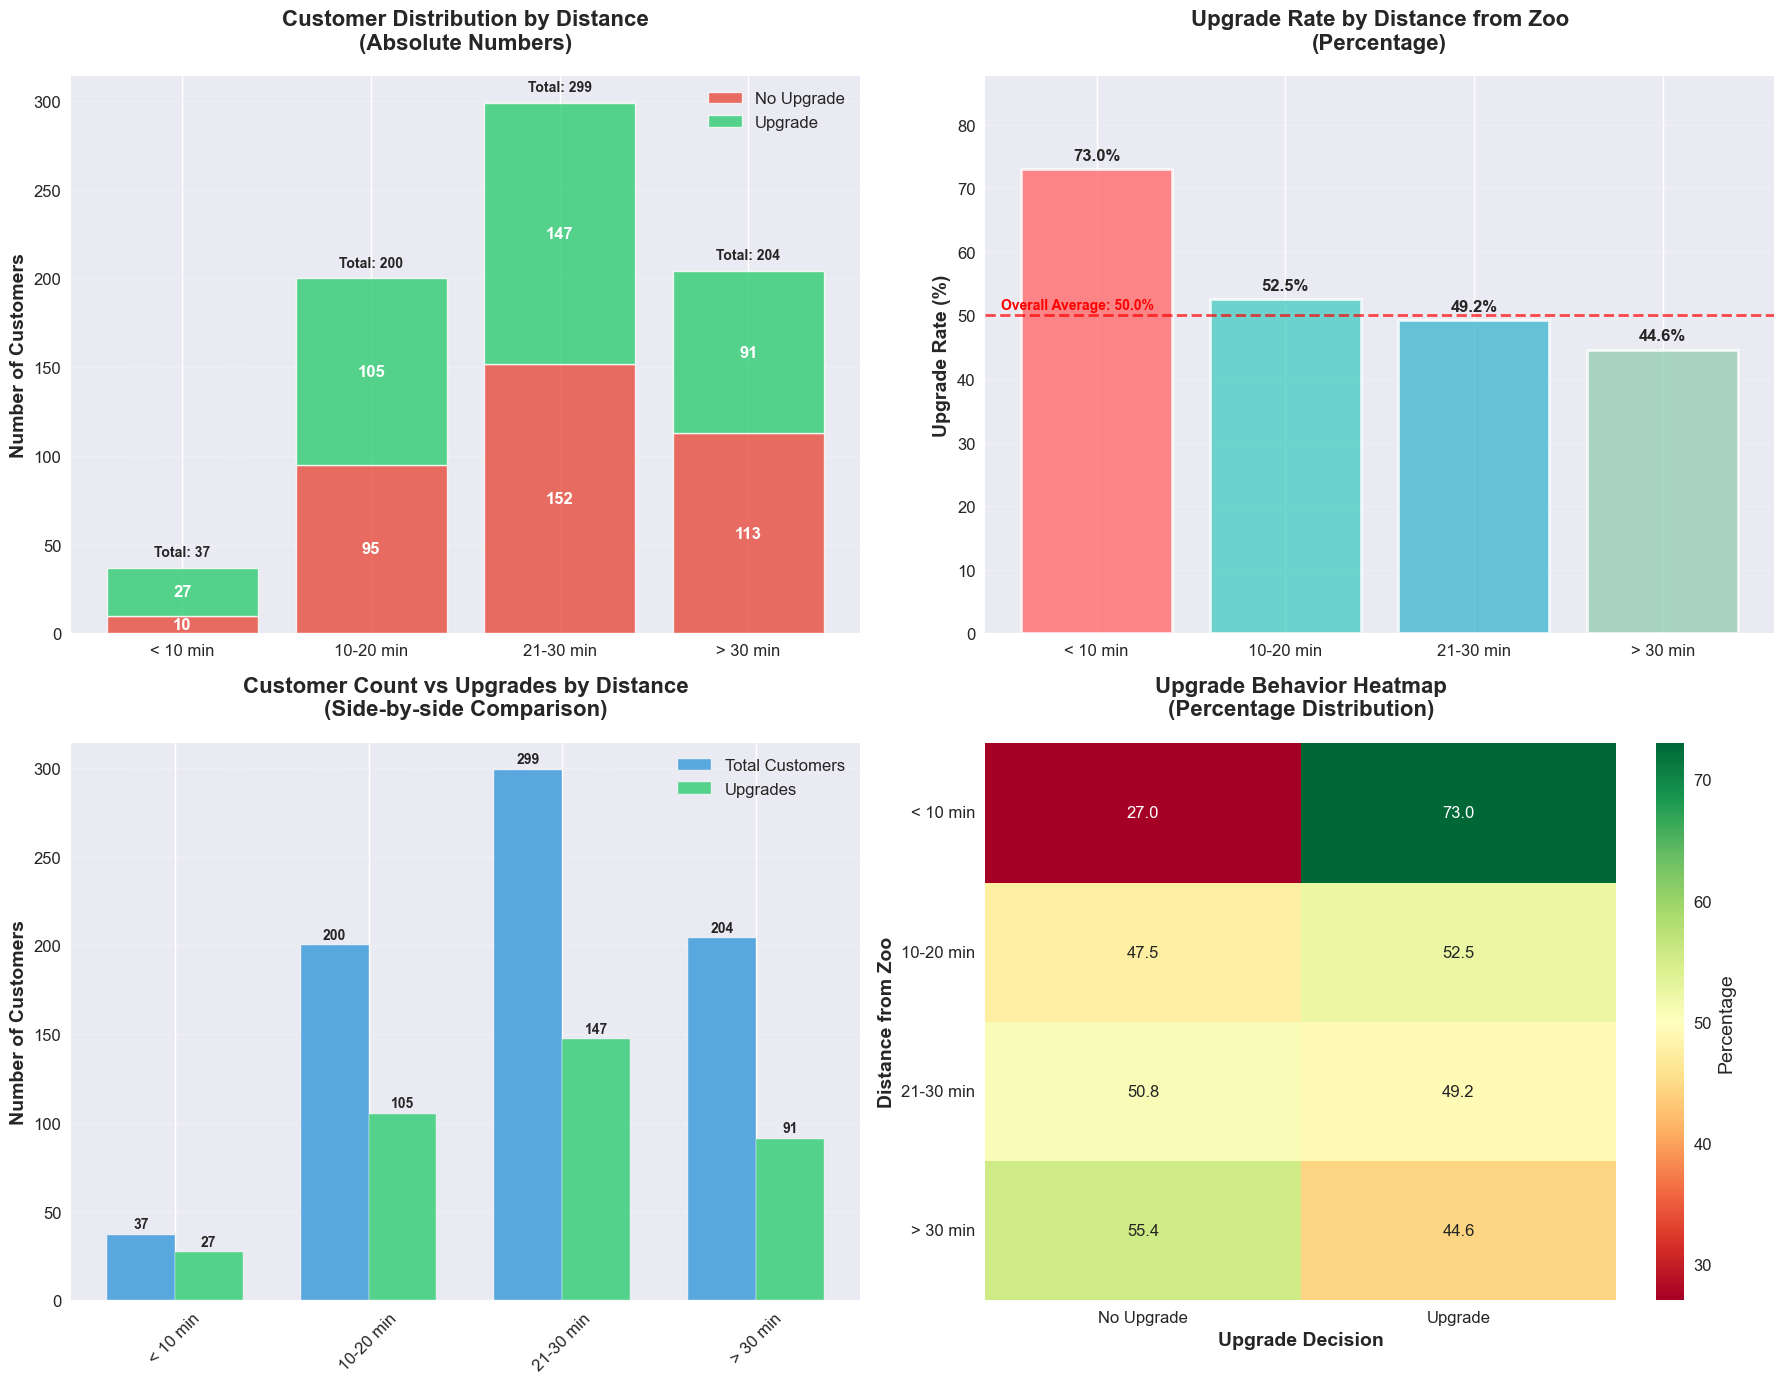

In [11]:
# Create comprehensive distance vs upgrade visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Stacked Bar Chart showing absolute numbers
dist_crosstab = pd.crosstab(train_data['dist_label'], train_data['UPD'])
dist_crosstab = dist_crosstab.reindex(['< 10 min', '10-20 min', '21-30 min', '> 30 min'])

bars1 = ax1.bar(dist_crosstab.index, dist_crosstab[0], 
                color=upgrade_colors[0], alpha=0.8, label='No Upgrade', edgecolor='white', linewidth=1)
bars2 = ax1.bar(dist_crosstab.index, dist_crosstab[1], 
                bottom=dist_crosstab[0], color=upgrade_colors[1], alpha=0.8, 
                label='Upgrade', edgecolor='white', linewidth=1)

# Add value labels
for i, (idx, row) in enumerate(dist_crosstab.iterrows()):
    total = row.sum()
    ax1.text(i, row[0]/2, f'{row[0]}', ha='center', va='center', fontweight='bold', color='white')
    ax1.text(i, row[0] + row[1]/2, f'{row[1]}', ha='center', va='center', fontweight='bold', color='white')
    ax1.text(i, total + 5, f'Total: {total}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_title('Customer Distribution by Distance\n(Absolute Numbers)', fontweight='bold', pad=20)
ax1.set_ylabel('Number of Customers', fontweight='bold')
ax1.legend(loc='upper right', framealpha=0.9)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 2. Upgrade Rate by Distance (Percentage)
upgrade_rates = dist_analysis['Upgrade_Rate'] * 100
colors_gradient = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = ax2.bar(upgrade_rates.index, upgrade_rates.values, 
               color=colors_gradient, alpha=0.8, edgecolor='white', linewidth=2)

# Add percentage labels on bars
for bar, rate in zip(bars, upgrade_rates.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax2.set_title('Upgrade Rate by Distance from Zoo\n(Percentage)', fontweight='bold', pad=20)
ax2.set_ylabel('Upgrade Rate (%)', fontweight='bold')
ax2.set_ylim(0, max(upgrade_rates.values) * 1.2)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add average line
avg_rate = train_data['UPD'].mean() * 100
ax2.axhline(y=avg_rate, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax2.text(0.02, avg_rate + 1, f'Overall Average: {avg_rate:.1f}%', 
         transform=ax2.get_yaxis_transform(), fontsize=10, color='red', fontweight='bold')

# 3. Grouped Bar Chart for detailed comparison
x = np.arange(len(dist_analysis.index))
width = 0.35

bars1 = ax3.bar(x - width/2, dist_analysis['Total_Customers'], width, 
                label='Total Customers', color='#3498DB', alpha=0.8, edgecolor='white')
bars2 = ax3.bar(x + width/2, dist_analysis['Upgrades'], width,
                label='Upgrades', color='#2ECC71', alpha=0.8, edgecolor='white')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax3.text(bar1.get_x() + bar1.get_width()/2., bar1.get_height() + 2,
             f'{int(bar1.get_height())}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    ax3.text(bar2.get_x() + bar2.get_width()/2., bar2.get_height() + 2,
             f'{int(bar2.get_height())}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax3.set_title('Customer Count vs Upgrades by Distance\n(Side-by-side Comparison)', fontweight='bold', pad=20)
ax3.set_ylabel('Number of Customers', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(dist_analysis.index, rotation=45)
ax3.legend(framealpha=0.9)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Heatmap showing upgrade patterns
pivot_data = train_data.groupby(['dist_label', 'UPD']).size().unstack(fill_value=0)
pivot_data = pivot_data.reindex(['< 10 min', '10-20 min', '21-30 min', '> 30 min'])
pivot_pct = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=50, ax=ax4, cbar_kws={'label': 'Percentage'})
ax4.set_title('Upgrade Behavior Heatmap\n(Percentage Distribution)', fontweight='bold', pad=20)
ax4.set_xlabel('Upgrade Decision', fontweight='bold')
ax4.set_ylabel('Distance from Zoo', fontweight='bold')
ax4.set_xticklabels(['No Upgrade', 'Upgrade'], rotation=0)
ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [12]:
# Generate insights summary for presentation
print("\n" + "="*70)
print("KEY INSIGHTS FROM DISTANCE ANALYSIS")
print("="*70)

# Find the distance category with highest and lowest upgrade rates
max_upgrade_dist = dist_analysis['Upgrade_Rate'].idxmax()
min_upgrade_dist = dist_analysis['Upgrade_Rate'].idxmin()
max_rate = dist_analysis.loc[max_upgrade_dist, 'Upgrade_Rate'] * 100
min_rate = dist_analysis.loc[min_upgrade_dist, 'Upgrade_Rate'] * 100

print("\n📍 DISTANCE IMPACT ON UPGRADES:")
print(f"   • Highest upgrade rate: {max_upgrade_dist} ({max_rate:.1f}%)")
print(f"   • Lowest upgrade rate:  {min_upgrade_dist} ({min_rate:.1f}%)")
print(f"   • Difference: {max_rate - min_rate:.1f} percentage points")

# Calculate statistical significance (Chi-square test)
chi2, p_value, dof, expected = chi2_contingency(dist_crosstab)

print("\n📊 STATISTICAL SIGNIFICANCE:")
print(f"   • Chi-square statistic: {chi2:.3f}")
print(f"   • P-value: {p_value:.4f}")
print(f"   • Significance: {'Significant' if p_value < 0.05 else 'Not significant'} at α=0.05")

# Business implications
print("\n💡 BUSINESS IMPLICATIONS:")
if max_rate > 50:
    print(f"   • Customers living {max_upgrade_dist} show higher upgrade propensity")
    print("   • Consider targeted marketing for this distance segment")
else:
    print("   • Distance appears to negatively impact upgrade likelihood")
    print("   • Focus on improving value proposition for distant customers")

print(f"   • Overall upgrade rate: {train_data['UPD'].mean()*100:.1f}%")
print("   • Distance-based segmentation may be valuable for strategy")
print("="*70)



KEY INSIGHTS FROM DISTANCE ANALYSIS

📍 DISTANCE IMPACT ON UPGRADES:
   • Highest upgrade rate: < 10 min (73.0%)
   • Lowest upgrade rate:  > 30 min (44.6%)
   • Difference: 28.4 percentage points

📊 STATISTICAL SIGNIFICANCE:
   • Chi-square statistic: 10.767
   • P-value: 0.0131
   • Significance: Significant at α=0.05

💡 BUSINESS IMPLICATIONS:
   • Customers living < 10 min show higher upgrade propensity
   • Consider targeted marketing for this distance segment
   • Overall upgrade rate: 50.0%
   • Distance-based segmentation may be valuable for strategy


### Visit Frequency vs Upgrade Behavior


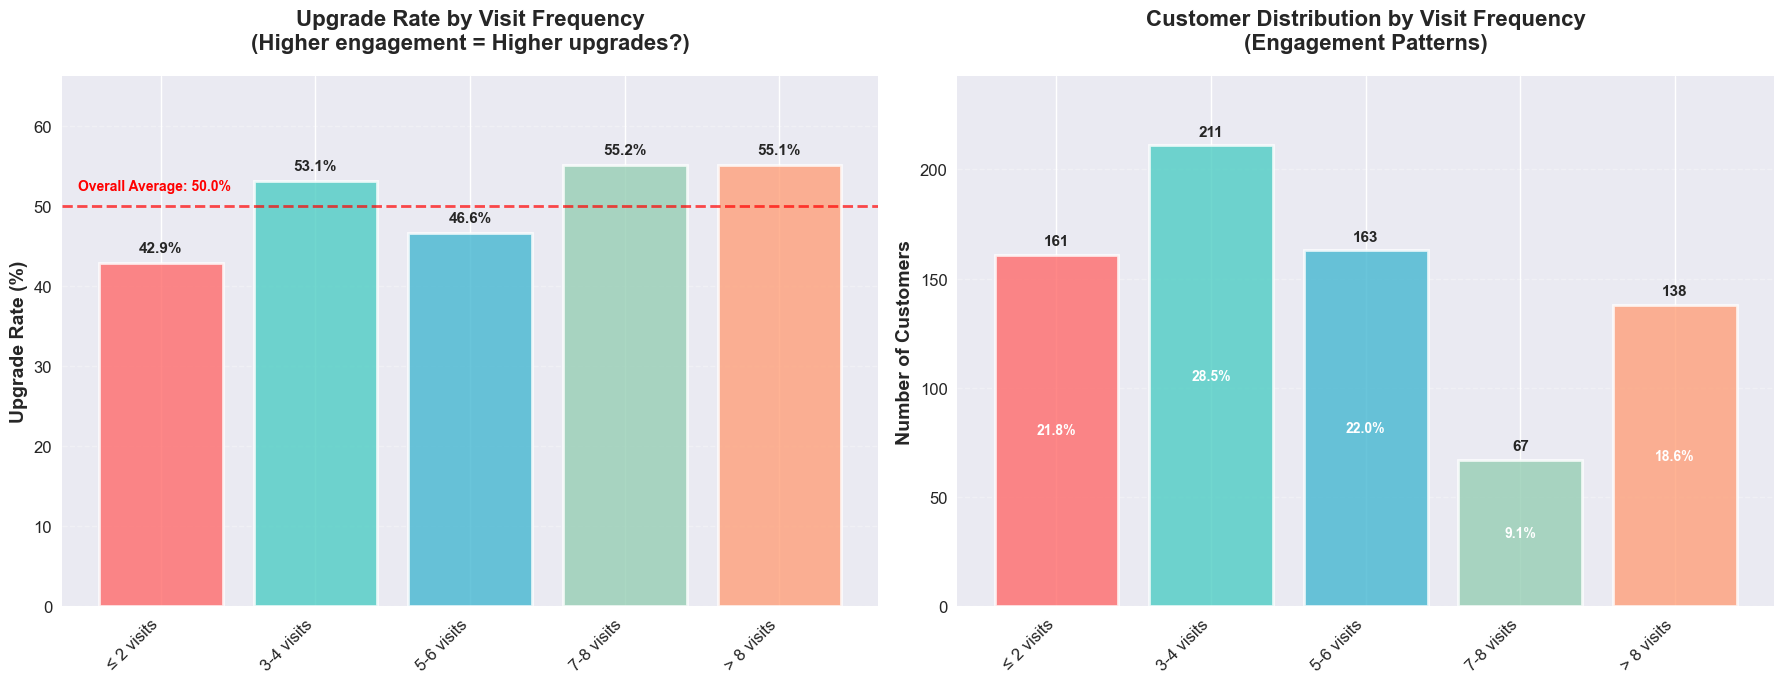


Visit Frequency vs Upgrade Analysis:
≤ 2 visits  : 161 customers,  69 upgrades ( 42.9%)
3-4 visits  : 211 customers, 112 upgrades ( 53.1%)
5-6 visits  : 163 customers,  76 upgrades ( 46.6%)
7-8 visits  :  67 customers,  37 upgrades ( 55.2%)
> 8 visits  : 138 customers,  76 upgrades ( 55.1%)


In [13]:
# Create visit frequency labels for better visualization
visit_labels = {1: '≤ 2 visits', 2: '3-4 visits', 3: '5-6 visits', 4: '7-8 visits', 5: '> 8 visits'}
train_data['tvis_label'] = train_data['tvis'].map(visit_labels)

# Calculate upgrade rates by visit frequency
visit_analysis = train_data.groupby('tvis_label').agg({
    'UPD': ['count', 'sum', 'mean']
}).round(3)
visit_analysis.columns = ['Total_Customers', 'Upgrades', 'Upgrade_Rate']
visit_analysis = visit_analysis.reindex(['≤ 2 visits', '3-4 visits', '5-6 visits', '7-8 visits', '> 8 visits'])

# Create a beautiful visualization for visit frequency vs upgrades
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 1. Upgrade rate by visit frequency
upgrade_rates_visits = visit_analysis['Upgrade_Rate'] * 100
colors_visits = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA07A']

bars = ax1.bar(range(len(upgrade_rates_visits)), upgrade_rates_visits.values, 
               color=colors_visits, alpha=0.8, edgecolor='white', linewidth=2)

# Add percentage labels on bars
for i, (bar, rate) in enumerate(zip(bars, upgrade_rates_visits.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_title('Upgrade Rate by Visit Frequency\n(Higher engagement = Higher upgrades?)', fontweight='bold', pad=20)
ax1.set_ylabel('Upgrade Rate (%)', fontweight='bold')
ax1.set_xticks(range(len(upgrade_rates_visits)))
ax1.set_xticklabels(upgrade_rates_visits.index, rotation=45, ha='right')
ax1.set_ylim(0, max(upgrade_rates_visits.values) * 1.2)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add average line
avg_rate = train_data['UPD'].mean() * 100
ax1.axhline(y=avg_rate, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.text(0.02, avg_rate + 2, f'Overall Average: {avg_rate:.1f}%', 
         transform=ax1.get_yaxis_transform(), fontsize=10, color='red', fontweight='bold')

# 2. Customer distribution by visit frequency
visit_counts = train_data['tvis_label'].value_counts()
visit_counts = visit_counts.reindex(['≤ 2 visits', '3-4 visits', '5-6 visits', '7-8 visits', '> 8 visits'])

bars = ax2.bar(range(len(visit_counts)), visit_counts.values, 
               color=colors_visits, alpha=0.8, edgecolor='white', linewidth=2)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, visit_counts.values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 3,
             f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    # Add percentage of total
    pct = count / len(train_data) * 100
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{pct:.1f}%', ha='center', va='center', fontweight='bold', color='white', fontsize=10)

ax2.set_title('Customer Distribution by Visit Frequency\n(Engagement Patterns)', fontweight='bold', pad=20)
ax2.set_ylabel('Number of Customers', fontweight='bold')
ax2.set_xticks(range(len(visit_counts)))
ax2.set_xticklabels(visit_counts.index, rotation=45, ha='right')
ax2.set_ylim(0, max(visit_counts.values) * 1.15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nVisit Frequency vs Upgrade Analysis:")
print("=" * 55)
for visit, row in visit_analysis.iterrows():
    print(f"{visit:12s}: {row['Total_Customers']:3.0f} customers, "
          f"{row['Upgrades']:3.0f} upgrades ({row['Upgrade_Rate']*100:5.1f}%)")
print("=" * 55)
